# LAB | Central Limit Theorem and Normality Tests


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Set random seed for reproducibility
np.random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8')

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [4]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

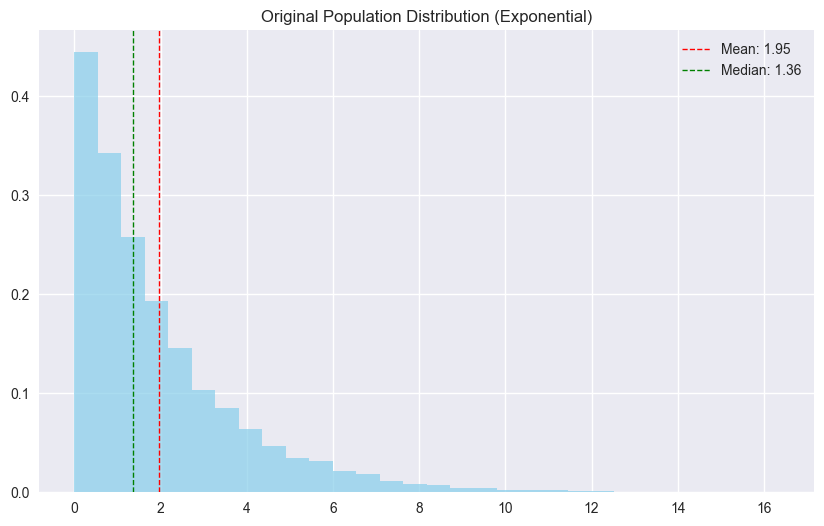

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
Skewness: 1.9190
Kurtosis: 5.1151



In [5]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

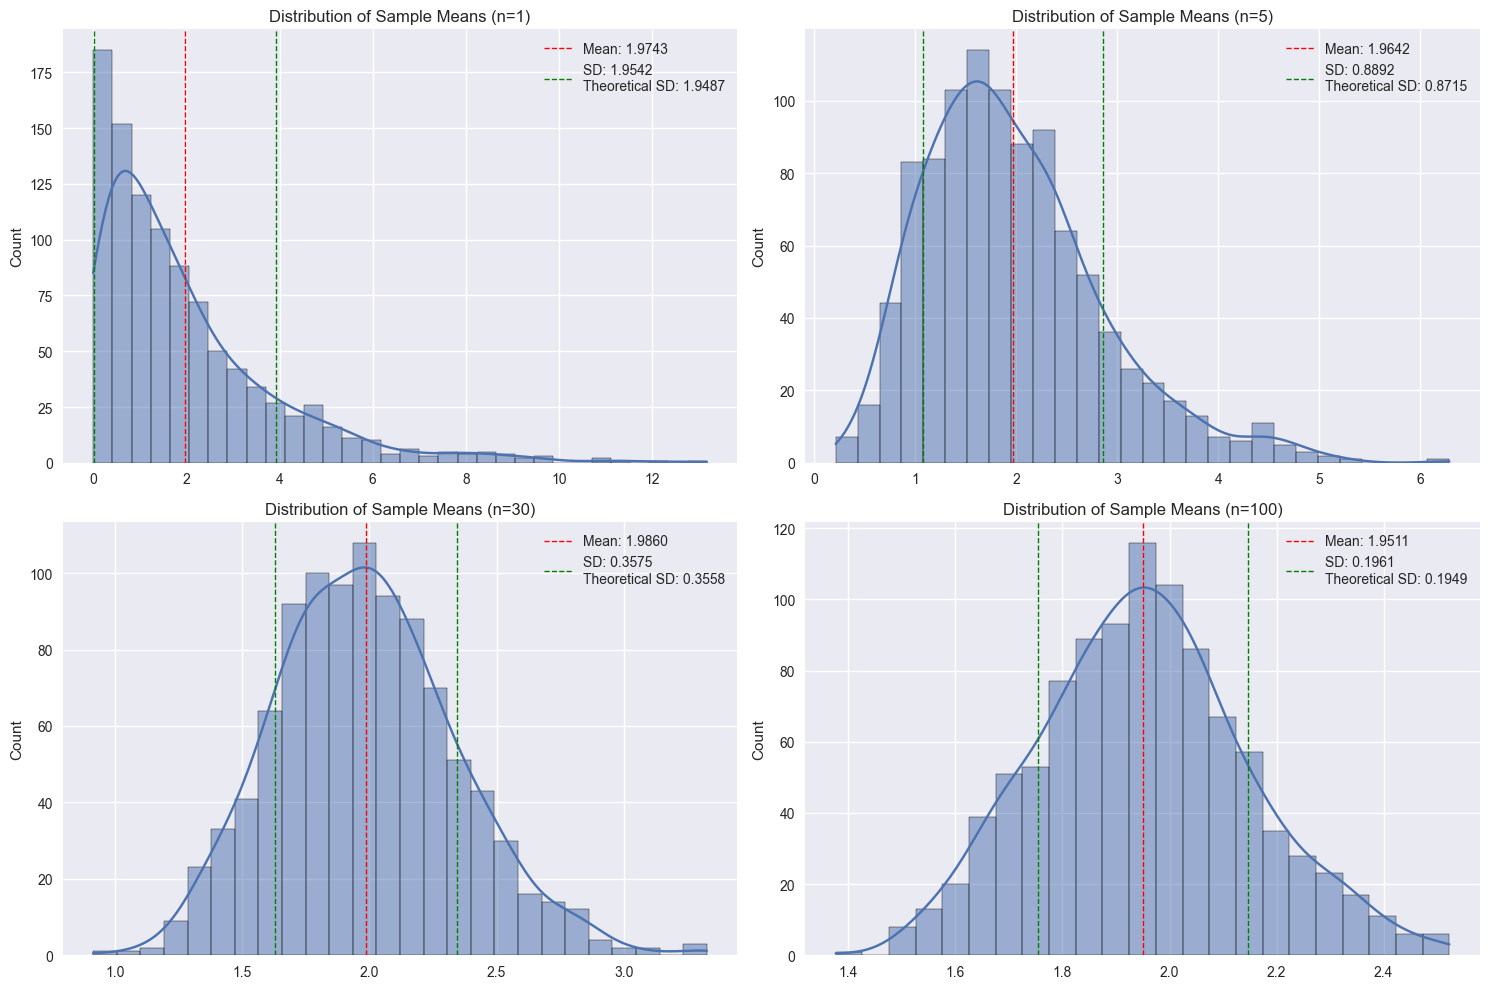

In [9]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

In [ ]:
# 1 Distribution becomes more normal
#2 
# Calculate the observed standard deviation of the sample means for each sample size
observed_sd = {}

for sample_size in sample_sizes:
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size)
        sample_means.append(np.mean(sample))
    observed_sd[sample_size] = np.std(sample_means)

# Calculate the theoretical standard deviation for each sample size
population_sd = np.std(population)  # Standard deviation of the population
theoretical_sd = {size: population_sd / np.sqrt(size) for size in sample_sizes}

observed_sd, theoretical_sd

#4 skewness disappears

({1: np.float64(2.028034568465262),
  5: np.float64(0.888199065258651),
  30: np.float64(0.3712639606818304),
  100: np.float64(0.1995876104562577)},
 {1: np.float64(1.9992145601341853),
  5: np.float64(0.8940759316134759),
  30: np.float64(0.3650049706260872),
  100: np.float64(0.19992145601341854)})

## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [16]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [17]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


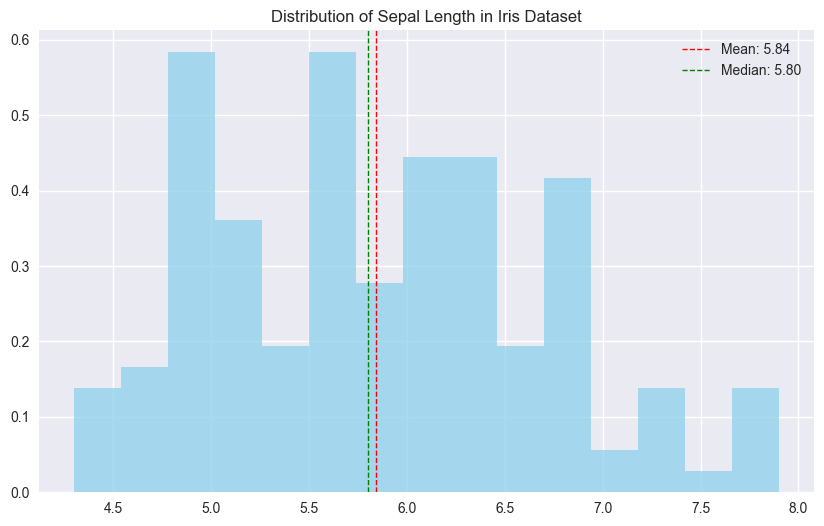

In [18]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

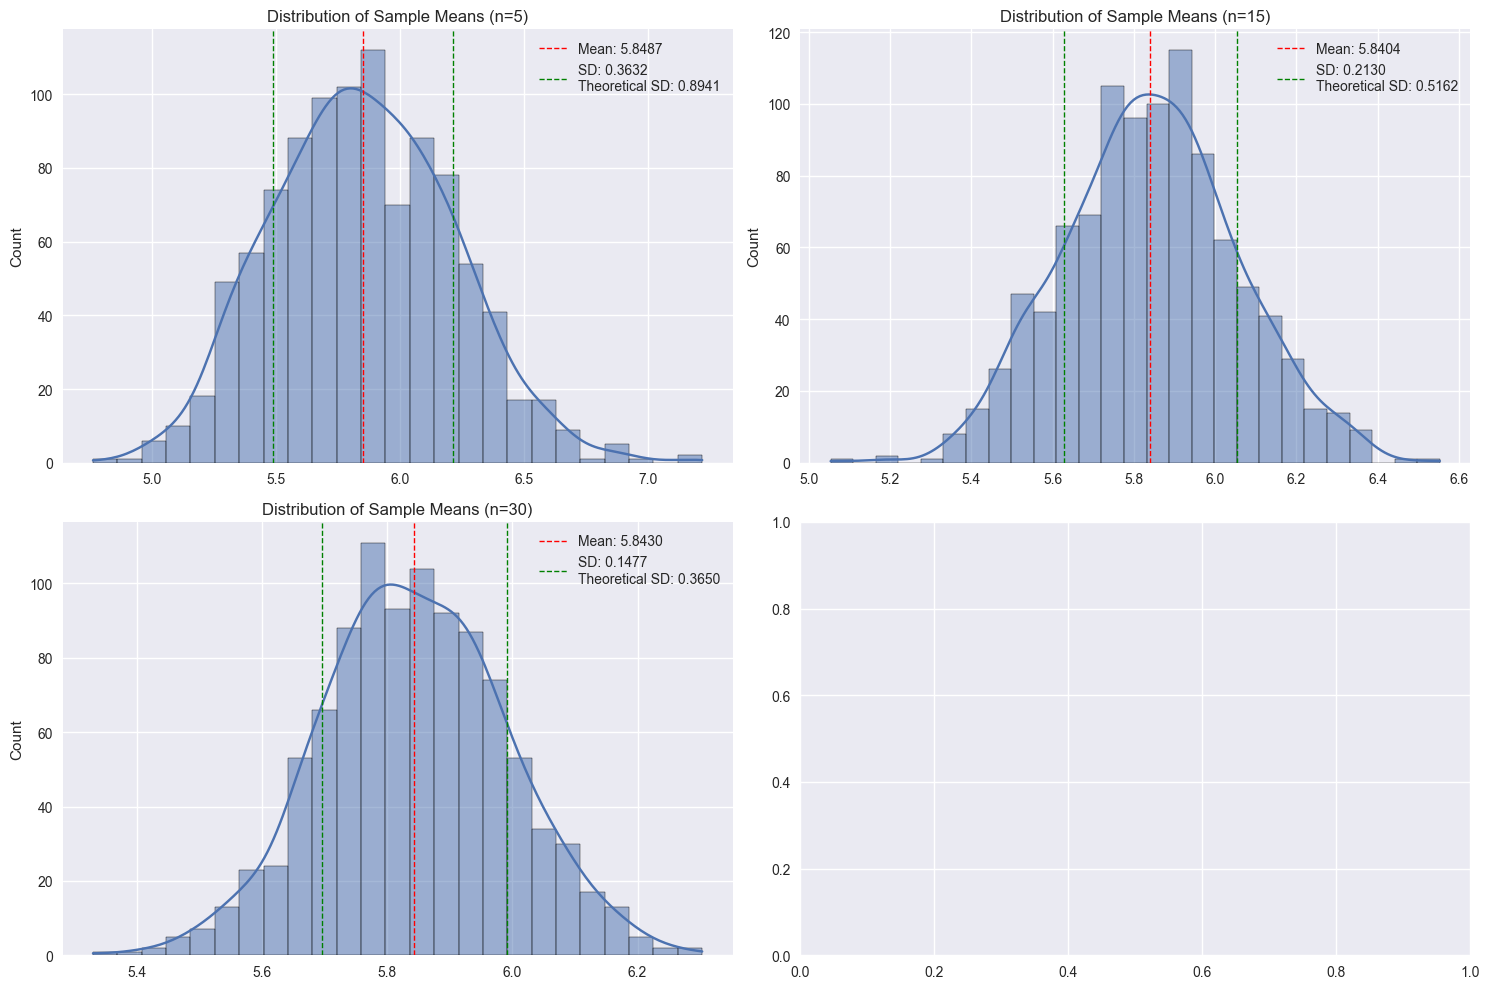

In [ ]:
# Set parameters
sample_sizes = [5, 15, 30]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(sepal_length, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [21]:
# Calculate the observed standard deviation of the sample means for each sample size
observed_sd = {}

for sample_size in sample_sizes:
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(sepal_length, size=sample_size)
        sample_means.append(np.mean(sample))
    observed_sd[sample_size] = np.std(sample_means)

# Calculate the theoretical standard deviation for each sample size
population_sd = np.std(sepal_length)  # Standard deviation of the population
theoretical_sd = {size: population_sd / np.sqrt(size) for size in sample_sizes}

observed_sd, theoretical_sd


({5: np.float64(0.3686958182567305),
  15: np.float64(0.21084560164569088),
  30: np.float64(0.14966270518142524)},
 {5: np.float64(0.3690859580699927),
  15: np.float64(0.21309187724582124),
  30: np.float64(0.15067871141629158)})

In [22]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(sepal_length)

shapiro_test_statistic, shapiro_p_value

(np.float64(0.9760902723490532), np.float64(0.010181161454691156))

## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [27]:
# Load Boston Housing dataset
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Display of the Boston Housing dataset:
boston_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MEDV, dtype: float64

In [29]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

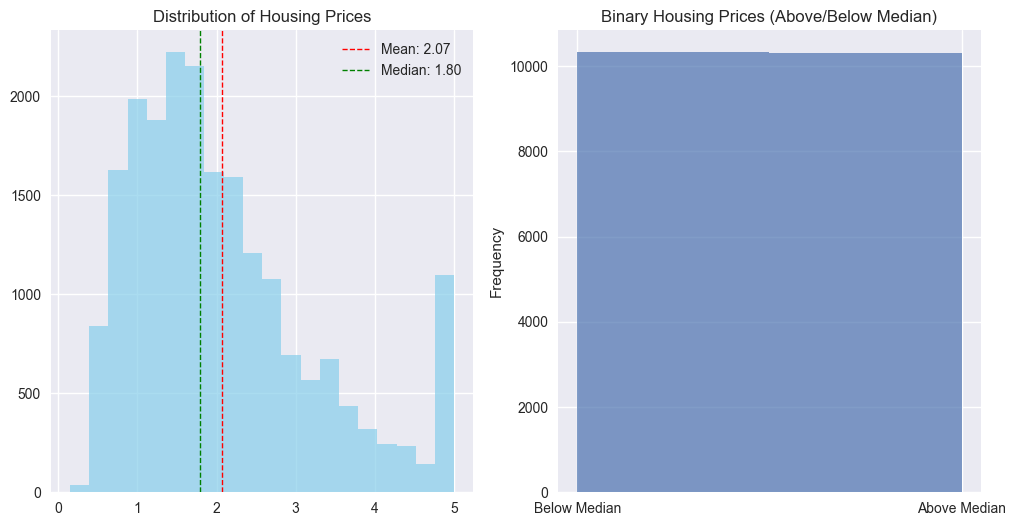

In [ ]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:
   a) Sample means
   b) Sample medians
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


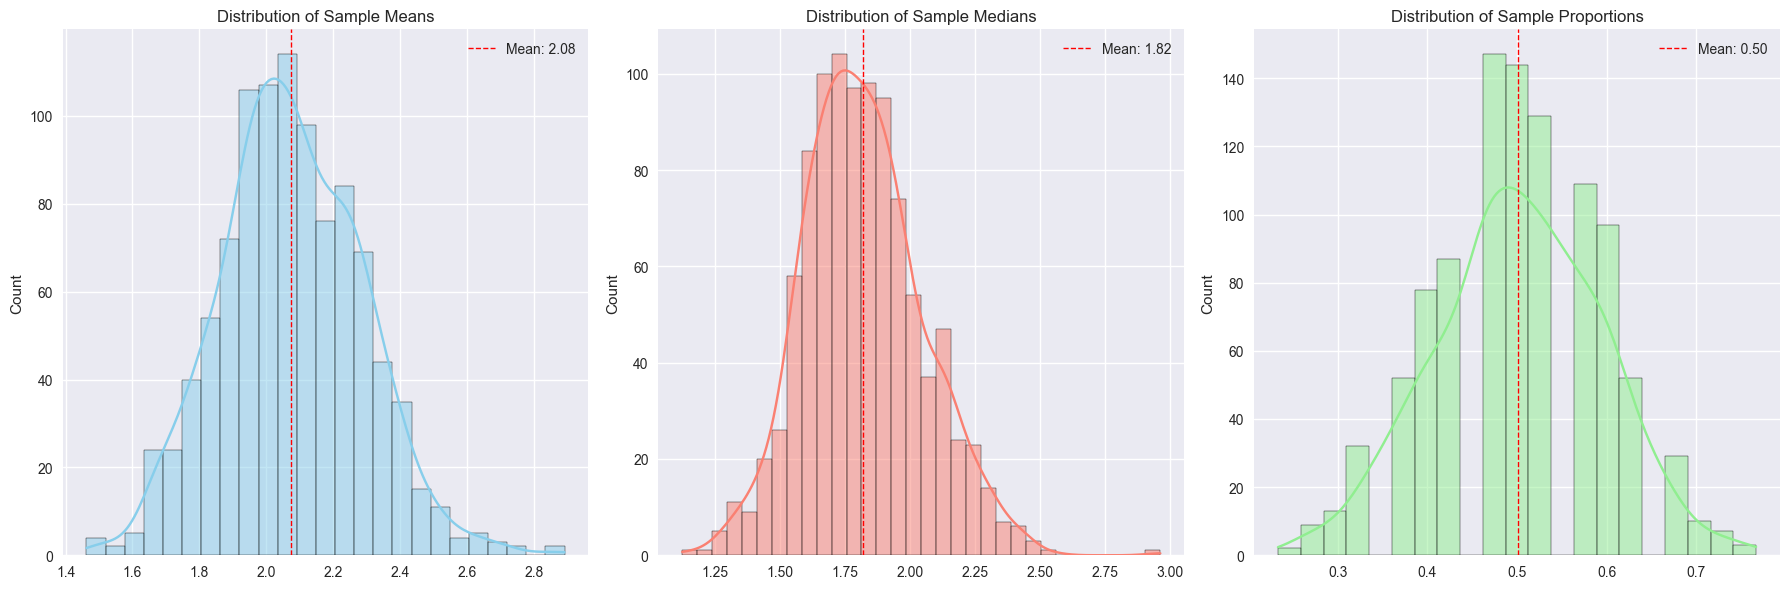

In [38]:
# TODO
# Your code here - implement sampling and plotting for different statistics
# Set parameters
sample_size = 30
n_samples = 1000

# Initialize lists to store sample statistics
sample_means = []
sample_medians = []
sample_proportions = []

# Perform sampling
for _ in range(n_samples):
    sample = np.random.choice(housing_prices, size=sample_size)
    sample_means.append(np.mean(sample))
    sample_medians.append(np.median(sample))
    sample_proportions.append(np.mean(sample > median_price))

# Plot the distributions of the sample statistics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sample means
sns.histplot(sample_means, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Sample Means')
axes[0].axvline(np.mean(sample_means), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_means):.2f}')
axes[0].legend()

# Sample medians
sns.histplot(sample_medians, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Sample Medians')
axes[1].axvline(np.mean(sample_medians), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_medians):.2f}')
axes[1].legend()

# Sample proportions
sns.histplot(sample_proportions, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Sample Proportions')
axes[2].axvline(np.mean(sample_proportions), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_proportions):.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [39]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

Preview of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())


Summary statistics for median income:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [41]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


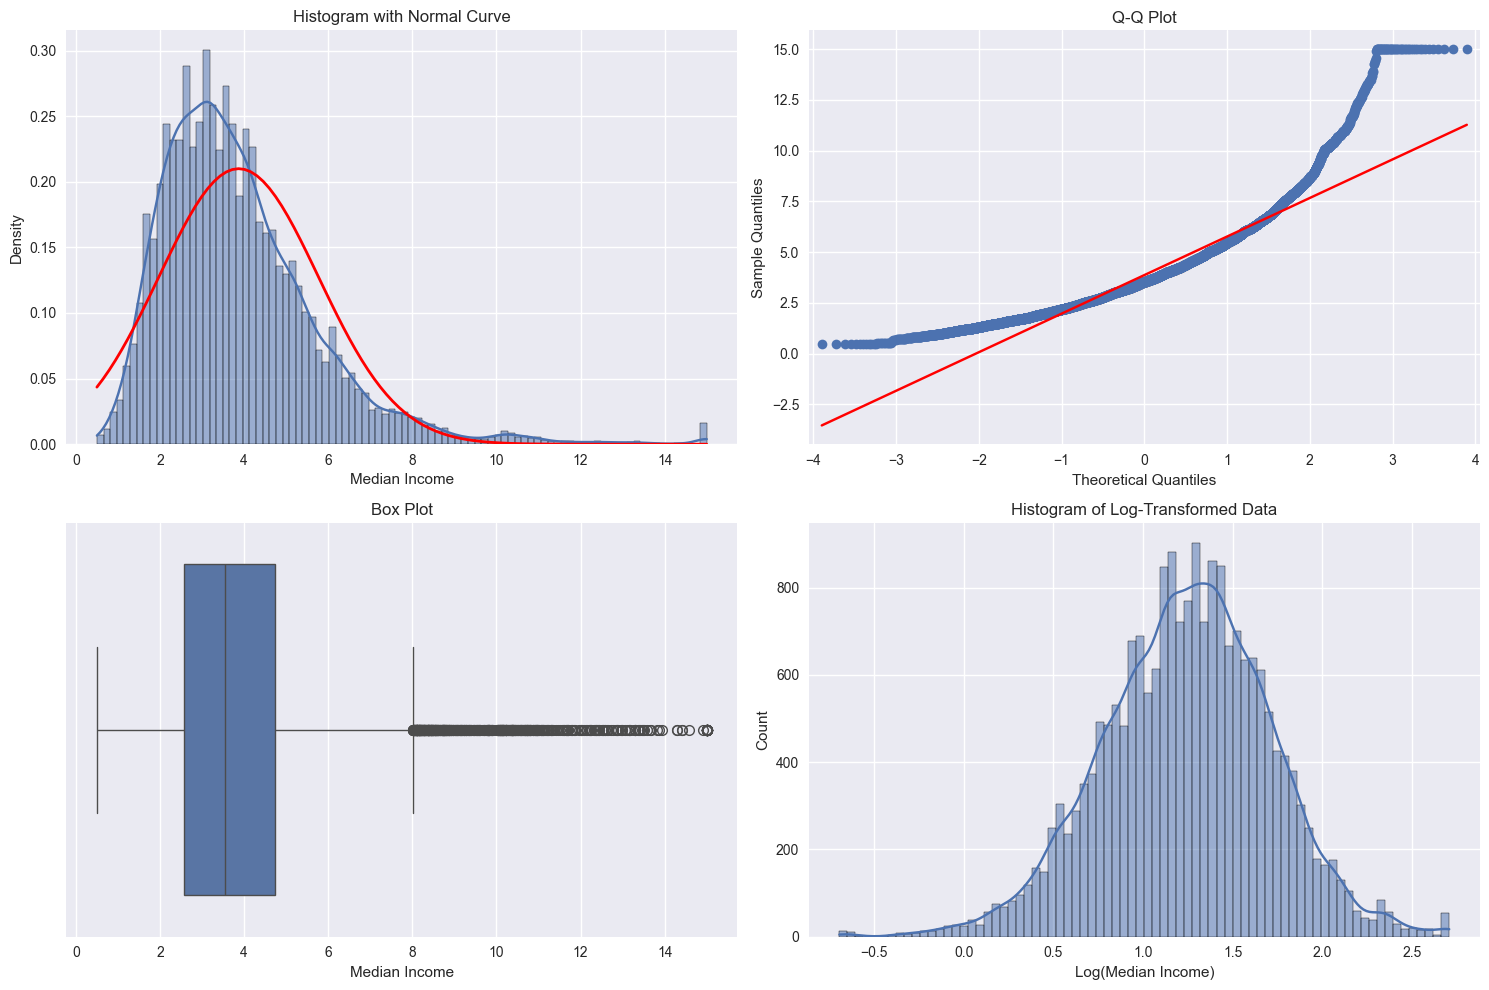

In [42]:
# Create some visualizations for normality assessment
plt.figure(figsize=(15, 10))

# Histogram with normal curve overlay
plt.subplot(2, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
# Add theoretical normal curve
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# Q-Q plot
plt.subplot(2, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(np.log(median_income), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()

Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

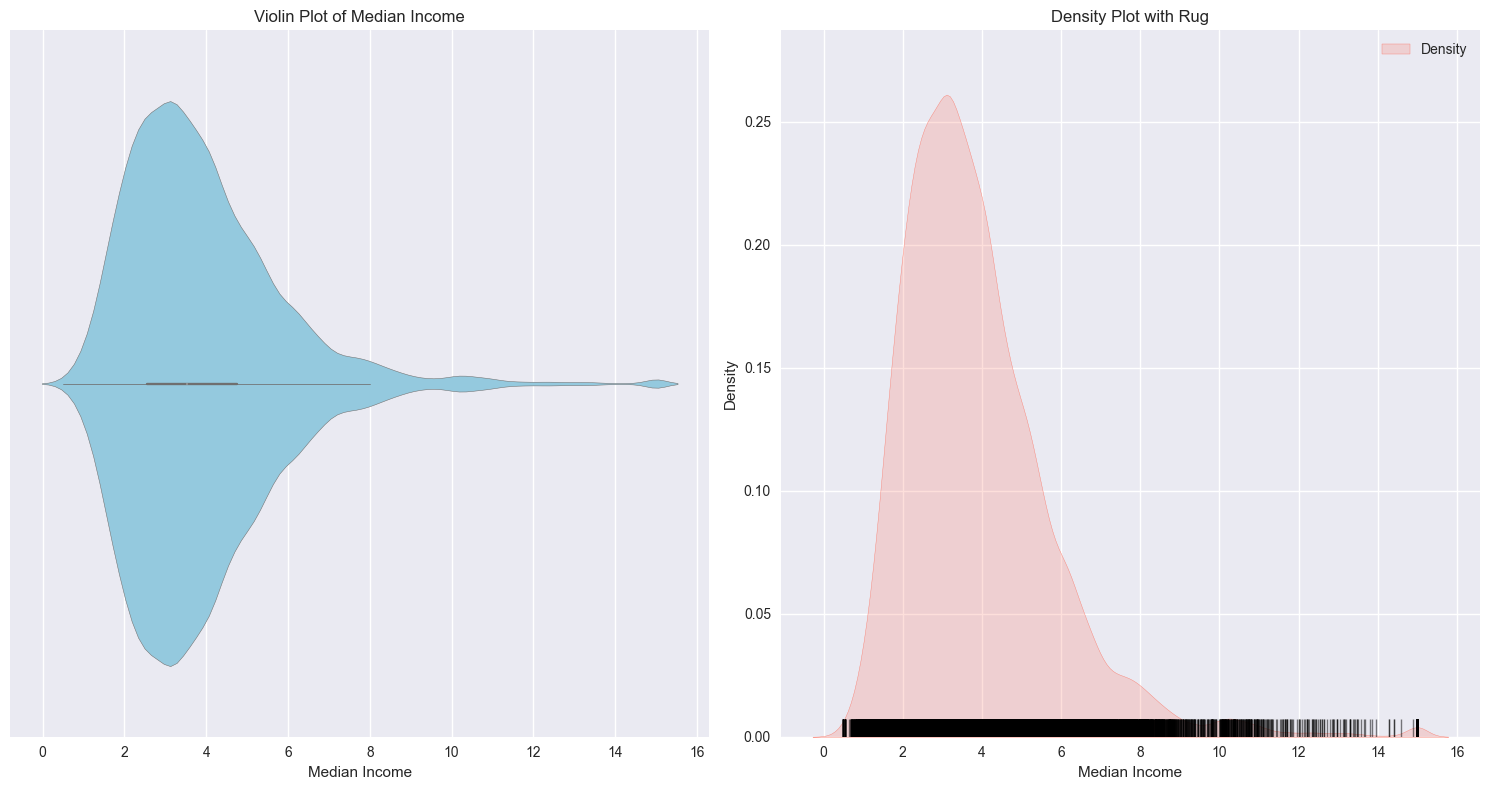

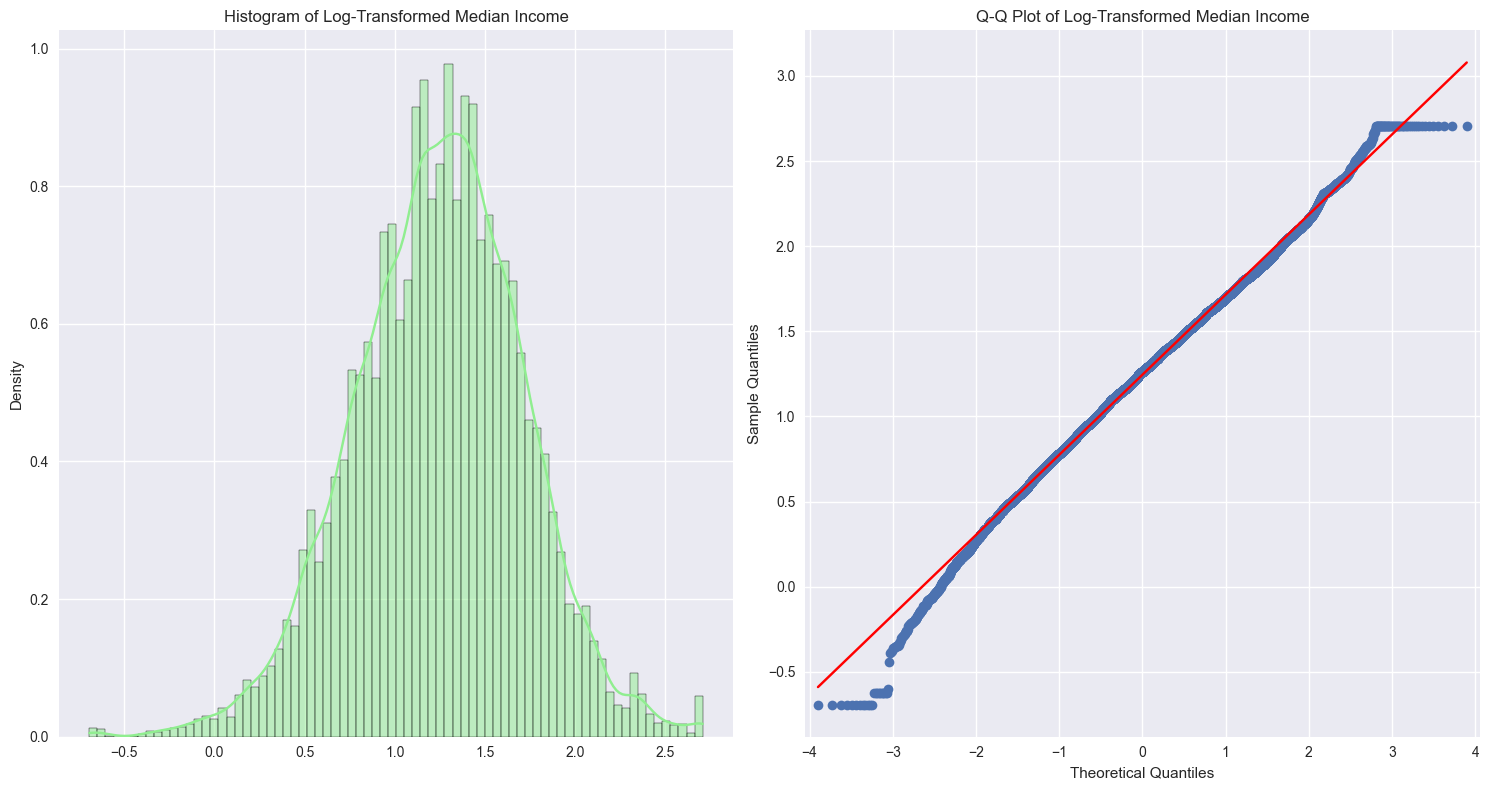

Original Data:
Shapiro-Wilk Test: Statistic=0.8932, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.0894, p-value=0.0000

Log-Transformed Data:
Shapiro-Wilk Test: Statistic=0.9972, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.0215, p-value=0.0000


c:\Programming\Ironhack\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [43]:
# Your code here - additional normality visualizations and transformations
# Additional visualizations to assess normality
plt.figure(figsize=(15, 8))

# Violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x=median_income, color='skyblue')
plt.title('Violin Plot of Median Income')
plt.xlabel('Median Income')

# Density plot with rug
plt.subplot(1, 2, 2)
sns.kdeplot(median_income, fill=True, color='salmon', label='Density')
sns.rugplot(median_income, color='black', alpha=0.5)
plt.title('Density Plot with Rug')
plt.xlabel('Median Income')
plt.legend()

plt.tight_layout()
plt.show()

# Log transformation to make the data more normal
log_median_income = np.log(median_income)

# Re-assess normality after transformation
plt.figure(figsize=(15, 8))

# Histogram of log-transformed data
plt.subplot(1, 2, 1)
sns.histplot(log_median_income, kde=True, color='lightgreen', stat="density")
plt.title('Histogram of Log-Transformed Median Income')

# Q-Q plot of log-transformed data
plt.subplot(1, 2, 2)
qqplot(log_median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Log-Transformed Median Income')

plt.tight_layout()
plt.show()

# Statistical tests for normality
# Original data
shapiro_stat_orig, shapiro_p_orig = stats.shapiro(median_income)
ks_stat_orig, ks_p_orig = stats.kstest(median_income, 'norm', args=(np.mean(median_income), np.std(median_income)))

# Transformed data
shapiro_stat_trans, shapiro_p_trans = stats.shapiro(log_median_income)
ks_stat_trans, ks_p_trans = stats.kstest(log_median_income, 'norm', args=(np.mean(log_median_income), np.std(log_median_income)))

# Display results
print("Original Data:")
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat_orig:.4f}, p-value={shapiro_p_orig:.4f}")
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat_orig:.4f}, p-value={ks_p_orig:.4f}\n")

print("Log-Transformed Data:")
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat_trans:.4f}, p-value={shapiro_p_trans:.4f}")
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat_trans:.4f}, p-value={ks_p_trans:.4f}")